# Lecture 3: Introduction to Scikit-Learn

In [1]:
import datetime
now = datetime.datetime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2020-01-17 12:01:13


# Scikit-Learn

[Scikit-Learn](http://scikit-learn.org/stable/) is an extremely popular python machine learning package.

Provides implementations of a number of different machine learning algorithms.

- Clean, uniform and streamlined API.
- Useful and complete online documentation.
- Straightforward to switch models or algorithms.

Two main general concepts:
- Data representation
- Estimator API

# Data representations

## Scikit-Learn includes a number of example data-sets

In [2]:
from sklearn import datasets

In [3]:
# Type datasets.<TAB> to see more
datasets.

## Data as a table

Best way to think about data in Scikit-Learn is in terms of tables of data.

Using the [`seaborn`](http://seaborn.pydata.org/) library we can read example data-sets as a Pandas `DataFrame`.

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [4]:
sns.load_dataset?

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Docstring:
Load a dataset from the online repository (requires internet).

Parameters
----------
name : str
    Name of the dataset (`name`.csv on
    https://github.com/mwaskom/seaborn-data).  You can obtain list of
    available datasets using :func:`get_dataset_names`
cache : boolean, optional
    If True, then cache data locally and use the cache on subsequent calls
data_home : string, optional
    The directory in which to cache data. By default, uses ~/seaborn-data/
kws : dict, optional
    Passed to pandas.read_csv
File:      /usr/local/lib/python3.7/site-packages/seaborn/utils.py
Type:      function


In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Iris data

Here we consider the [Iris flower data](https://en.wikipedia.org/wiki/Iris_flower_data_set).

- Introduced by statistician and biologist Ronald Fisher in 1936 paper.

- Consists of 50 samples of three different species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor).

- Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. 


In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Parts of a flower

Measured flower [petals](https://en.wikipedia.org/wiki/Petal) and [sepals](https://en.wikipedia.org/wiki/Sepal).

<center><img src="Lecture03_Images/Mature_flower_diagram.png" style="width: 1000px;"/></center>

[Image credit: [Mariana Ruiz](https://en.wikipedia.org/wiki/Sepal#/media/File:Mature_flower_diagram.svg)]

### Images of different species

<table border="0" cellpadding="0">
  <tr>
    <td><img src="Lecture03_Images/iris_setosa.jpg" alt="setosa" style="height: 250px;"/></td>
    <td><img src="Lecture03_Images/iris_versicolor.jpg" alt="versicolor" style="height: 250px;"/></td>
    <td><img src="Lecture03_Images/iris_virginica.jpg" alt="virginica" style="height: 250px;"/></td>
  </tr>
  <tr>
    <td><center>Iris Setosa</center></td>
    <td><center>Iris Versicolor</center></td>
    <td><center>Iris Virginica</center></td>    
  </tr>
</table>

[[Image source](https://github.com/jakevdp/sklearn_tutorial)]


## Features matrix

Recall data represented to learning algorithm as "*features*".

Each row corresponds to an observed (*sampled*) flower, with a number of *features*.

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In this example we extract a feature matrix, removing species (which we want to predict).

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# feature matrix
X_iris = iris.drop('species', axis='columns')
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
type(X_iris)

pandas.core.frame.DataFrame

## Target array

Consider 1D *target array* containing labels or targets that we want to predict.

May be numerical values or discrete classes/labels.

In this example we want to predict the flower species from other measurements.

In [11]:
 # target array of labels
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [20]:
type(y_iris)

print("Total", y_iris.shape[0],"\n", y_iris.value_counts())

Total 150 
 versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


## Features matrix and target vector

<center><img src="Lecture03_Images/data-layout.png" alt="data-layout" style="height: 300px;"/></center>

[[Image source](https://github.com/jakevdp/sklearn_tutorial)]

In [21]:
X_iris.shape
print("features", X_iris.shape[1])

features 4


In [14]:
y_iris.shape

(150,)

## Visualizing the data

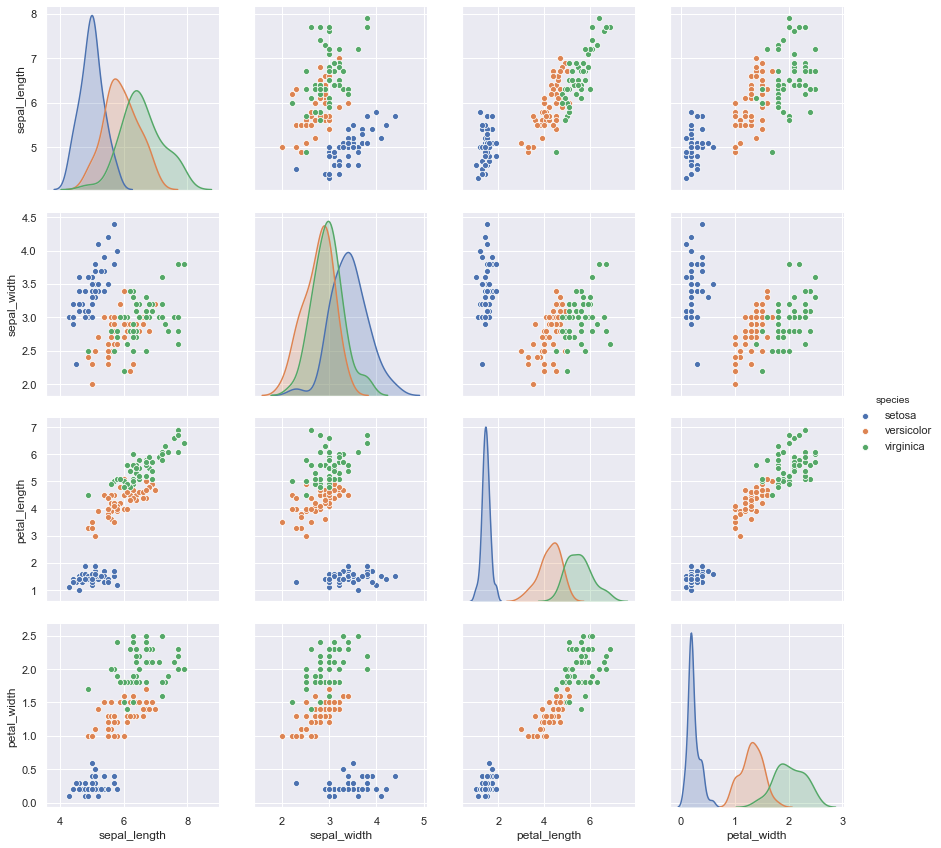

In [25]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=3.0);

### Exercise: How well do you expect classification to perform with these features and why?

# Scikit-Learn's Estimator API

## Scikit-Learn API design principles

- Consistency: All objects share a common interface.
- Inspection: All specified parameter values exposed as public attributes.
- Limited object hierarchy: Only algorithms are represented by Python classes; data-sets/parameters represented in standard formats.
- Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms.
- Sensible defaults: Library defines appropriate default value.

## Impact of design principles

- Makes Scikit-Learn easy to use, once the basic principles are understood. 
- Every machine learning algorithm in Scikit-Learn implemented via the Estimator API.
- Provides a consistent interface for a wide range of machine learning applications.

## Typical Scikit-Learn Estimator API steps

1. Choose a class of model (import appropriate estimator class).
2. Choose model hyperparameters (instantiate class with desired values).
3. Arrange data into a features matrix and target vector.
4. Fit the model to data (calling `fit` method of model instance).
5. Apply model to new data:
   - Supervised learning: often predict targets for unknown data using the `predict` method.
   - For unsupervised learning: often transform or infer properties of the data using the `transform` or `predict` method.

## Linear regression as machine learning

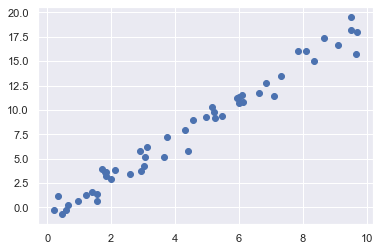

In [26]:
import matplotlib.pyplot as plt
import numpy as np

n_samples = 50
rng = np.random.RandomState(42)
x = 10 * rng.rand(n_samples)
y = 2 * x - 1 + rng.randn(n_samples)
plt.scatter(x, y);

### 1. Choose a class of model

Every class of model is represented by a Python class.

In [27]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameters

Make instance of model with defined hyperparameters (e.g. y-intersect, regularization).

In [28]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3. Arrange data into a features matrix and target vector

In [29]:
X = x.reshape(n_samples,1)
X.shape

(50, 1)

In [30]:
y.shape 

(50,)

### 4. Fit the model to data


In [31]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

All model parameters that were learned during the `fit()` process have *trailing underscores*.

In [32]:
model.intercept_

-0.9033107255311146

In [33]:
model.coef_

array([1.9776566])

Intercept and slope are close to the model used to generate the data (-1 and 2 respectively).

### 5. Predict targets for unknown data

In [34]:
n_fit = 50
xfit = np.linspace(-1, 11, n_fit)
Xfit = xfit.reshape(n_fit,1)
yfit = model.predict(Xfit)

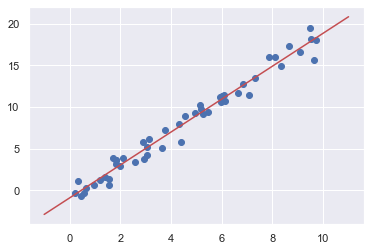

In [35]:
plt.scatter(x, y)
plt.plot(xfit, yfit, 'r');

# Supervised learning example: classification

Consider Iris data-set again and predict species.

### Exercise: set up data

Split data into training and test sets (hint: [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is a convenient scikit-learn function for this task).

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.7, random_state=12)

### Exercise: Classify species

Use a Gaussian Naive Bayes (`GaussianNB`) model to predict Iris species.  Then evaluate performance on test data.

(Hint: choose, instantiate, fit and predict.) 

See Scikit-Learn documentation on [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

Evaluate performance using simple [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).

(Do not set any priors.)

In [62]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB() # instan. w/o hyperparameters

In [63]:
model1.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_model = model1.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9523809523809523

# Unsupervised learning example: dimensionality reduction


Reduce dimensionality of Iris data for visualisation or to discover structure.

Recall the original Iris data has four features.

In [66]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
X_iris.shape

(150, 4)

### Exercise: Iris dimensionality reduction

Compute principle component analysis (`PCA`), with 2 components, and apply transform.  Plot data in PCA space. 

(Hint: choose, instantiate, fit and transform.)

See Scikit-Learn documentation on [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

See Seaborn documentation on [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
model2 = pca.fit(X_iris)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [87]:
X_trans= model2.transform(X_iris) 
# X_trans

In [ ]:
# TODO join PCAs into X_iris 

### Exercise: How well do you expect classification to perform using PCA components as features and why?

# Unsupervised learning example: clustering

Attempt to find "groups" in Iris data without given labels or training data.


### Exercise: Cluster Iris data 

Cluster Iris data into 3 components using Gaussian Mixture Model (GMM).  Plot the 3 components separately in PCA space.

(Hint: choose, instantiate, fit and predict.)

See Scikit-Learn documentation on [`GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

In [90]:
from sklearn.mixture import GaussianMixture as GMM
# model = GMM ... 

# Exercise: Classify hand-written digits 

Load example Scikit-Learn data.

In [91]:
from sklearn.datasets import load_digits
digits = load_digits()

- Explore the data-set and plot some example images.
- Split the data-set into training and test sets.
- Train a logistic regression classifier with an $\ell_2$ penalty.
- Compute the accuracy of predictions on the test set.

In [96]:
from sklearn.linear_model import LogisticRegression as LR
x_train, x_test, y_train, y_test = train_test_split(digits)

KeyError: 1